In [6]:
'''
This code will grab USGS streamflow data for a defined period of interest 

'''

# first import the functions for downloading data from NWIS
import dataretrieval.nwis as nwis
import pandas as pd
import matplotlib.pyplot as plt

# specify the USGS site code for which we want data.
site = ['01054500']

# get instantaneous values (iv)
df = nwis.get_record(sites=site, service='iv', start='2019-02-01', end='2019-04-01')
df.reset_index(inplace=True) #reset index to grab station date
df['datetime'] = pd.to_datetime(df['datetime'], utc=True, format = '%Y-%m-%d %H:%M:%S') #transfer to utc so same time throughout
df_quarter = df.iloc[:,[0,4]] #locates every row by the columns we want (date and flow)
df_quarter.columns = ['Date', 'Flow'] # rename column headers 
print(df_quarter)

## Make copy od dataframe to average flow every hour 
df_copy = df.copy()
df_copy['datetime'] = pd.to_datetime(df_copy['datetime'], utc=True, format = '%Y-%m-%d %H:%M:%S') #convert datetime to average every hour 
#df_copy.reset_index(inplace=True) #reset indexes so can grab "Date" column
#df_copy.drop("datetime", axis=1, inplace=True) #drop unneccsary date column now 
df_copy.index = df_copy['datetime'] # index so can pull date time in resample
df_avg = df_copy.resample('H').mean() # Average every hour based on datetime
df_avg.reset_index(inplace=True) #reset index again to have datetime 
df_avgflow = df_avg.iloc[:,[0,2]] #locates every row by the columns we want (date and flow)
df_avgflow.columns = ['Date', 'Flow']
print(df_avgflow)


                          Date  Flow
0    2019-02-01 05:00:00+00:00  5.23
1    2019-02-01 05:15:00+00:00  5.23
2    2019-02-01 05:30:00+00:00  5.22
3    2019-02-01 05:45:00+00:00  5.21
4    2019-02-01 06:00:00+00:00  5.22
...                        ...   ...
5751 2019-04-02 02:45:00+00:00  6.81
5752 2019-04-02 03:00:00+00:00  6.78
5753 2019-04-02 03:15:00+00:00  6.76
5754 2019-04-02 03:30:00+00:00  6.78
5755 2019-04-02 03:45:00+00:00  6.76

[5756 rows x 2 columns]
                          Date    Flow
0    2019-02-01 05:00:00+00:00  5.2225
1    2019-02-01 06:00:00+00:00  5.2200
2    2019-02-01 07:00:00+00:00  5.2225
3    2019-02-01 08:00:00+00:00  5.2175
4    2019-02-01 09:00:00+00:00  5.2175
...                        ...     ...
1434 2019-04-01 23:00:00+00:00  6.9100
1435 2019-04-02 00:00:00+00:00  6.8000
1436 2019-04-02 01:00:00+00:00  6.8825
1437 2019-04-02 02:00:00+00:00  6.8325
1438 2019-04-02 03:00:00+00:00  6.7700

[1439 rows x 2 columns]


                          Date  Flow  Min_Error_Plus  Min_Error_Minus  \
0    2019-02-01 05:00:00+00:00  5.23          5.3346           5.1254   
1    2019-02-01 05:15:00+00:00  5.23          5.3346           5.1254   
2    2019-02-01 05:30:00+00:00  5.22          5.3244           5.1156   
3    2019-02-01 05:45:00+00:00  5.21          5.3142           5.1058   
4    2019-02-01 06:00:00+00:00  5.22          5.3244           5.1156   
...                        ...   ...             ...              ...   
5751 2019-04-02 02:45:00+00:00  6.81          6.9462           6.6738   
5752 2019-04-02 03:00:00+00:00  6.78          6.9156           6.6444   
5753 2019-04-02 03:15:00+00:00  6.76          6.8952           6.6248   
5754 2019-04-02 03:30:00+00:00  6.78          6.9156           6.6444   
5755 2019-04-02 03:45:00+00:00  6.76          6.8952           6.6248   

      Max_Error_Plus  Max_Error_Minus  
0              1.046           -1.046  
1              1.046           -1.046  
2  

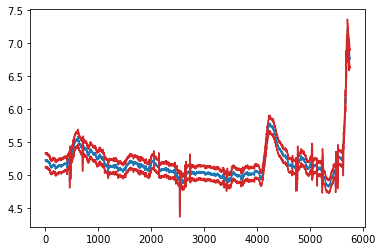

In [14]:
## Make new list of standard error associated with each flow measurement in 15min USGS data
df_error = df_quarter.loc[:,"Flow"]

#calculate minimum error of flow
df_error_min_plus = (df_error*0.02) + df_error
df_error_min_minus = (df_error*0.02*-1) + df_error
#calculate maximum error of flow
df_error_max_plus = df_error*0.2
df_error_max_minus = df_error*0.2*-1

#concatonate error columns together
df_error_table = pd.concat([df_error_min_plus, df_error_min_minus, df_error_max_plus, df_error_max_minus],axis=1)
df_error_table.columns = ['Min_Error_Plus','Min_Error_Minus', 'Max_Error_Plus', 'Max_Error_Minus']
#print(df_error_table)

#concatonate 15min USGS data with error bars
df_final = pd.concat([df_quarter, df_error_table], axis=1)
print(df_final)

## Visualize the error bars with USGS data
flow = df_final.loc[:,"Flow"]
x = df_final.loc[:,"Min_Error_Plus"]
x2 =  df_final.loc[:,"Min_Error_Minus"]
plt.plot(flow)
plt.plot(x, color = 'tab:red', marker ='.',markersize=0.001)
plt.plot(x2, color = 'tab:red', marker ='.',markersize=0.001)
#plt.title(output)
plt.show()
